In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Risk verilerini içeren bir veri çerçevesi oluşturuyoruz
data = {
    'Risk': [
        'Pazar araştırmasında hatalar', 'Rekabet analizi yetersiz kalması', 'Finansal planlamada eksiklikler',
        'Ruhsat ve izinlerde gecikmeler', 'Yanlış lokasyon seçimi', 'Yerel yönetim ve izinlerde sorunlar',
        'Tasarım ve inşaat sürecinde aksaklıklar', 'Tedarik zinciri problemleri', 'Menü planlama ve geliştirme sürecinde hatalar',
        'İşe alımda doğru adayları bulamama', 'Eğitim ve oryantasyon sürecinde yetersizlik',
        'Marka oluşturma sürecinde başarısızlık', 'Sosyal medya ve reklam kampanyalarının etkisizliği',
        'Stok yönetiminde problemler', 'Teknoloji ve sistemlerin uyumsuzluğu', 
        'Açılış etkinliğinde düşük katılım', 'Günlük operasyonların verimli yönetilememesi'
    ],
    'Olasılık': [6, 6, 8, 8, 6, 8, 8, 6, 4, 6, 6, 6, 6, 6, 4, 6, 6],
    'Etki': [8, 6, 10, 8, 10, 8, 10, 8, 6, 8, 6, 8, 8, 8, 8, 8, 8],
    
}

df = pd.DataFrame(data)

# Risk Puanı hesaplama
df['Risk Puanı'] = df['Olasılık'] * df['Etki']

# Riskleri önceliklendirme (Risk Puanına göre azalan sırada)
df_sorted = df.sort_values(by='Risk Puanı', ascending=False)

# Sonuçları gösterme
print(df_sorted)


                                                 Risk  Olasılık  Etki  \
2                     Finansal planlamada eksiklikler         8    10   
6             Tasarım ve inşaat sürecinde aksaklıklar         8    10   
3                      Ruhsat ve izinlerde gecikmeler         8     8   
5                 Yerel yönetim ve izinlerde sorunlar         8     8   
4                              Yanlış lokasyon seçimi         6    10   
0                        Pazar araştırmasında hatalar         6     8   
11             Marka oluşturma sürecinde başarısızlık         6     8   
15                  Açılış etkinliğinde düşük katılım         6     8   
13                        Stok yönetiminde problemler         6     8   
12  Sosyal medya ve reklam kampanyalarının etkisiz...         6     8   
16       Günlük operasyonların verimli yönetilememesi         6     8   
9                  İşe alımda doğru adayları bulamama         6     8   
7                         Tedarik zinciri problemle

/var/folders/hz/hhcwj2sd1pq_fr0ynsft46400000gn/T/ipykernel_81673/2421869171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risk Puanı', y='Risk', data=df_sorted, palette='viridis')


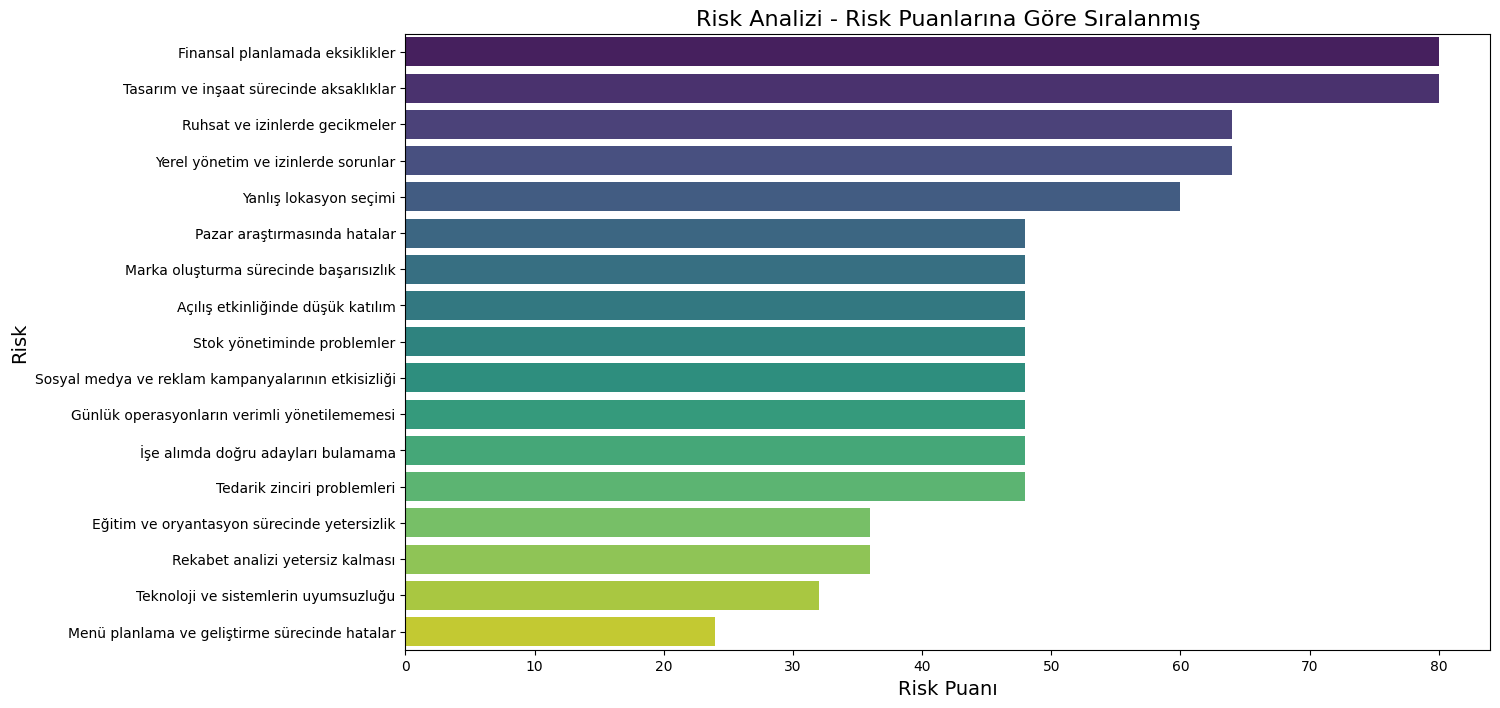

In [5]:


# Grafik oluşturma
plt.figure(figsize=(14, 8))
sns.barplot(x='Risk Puanı', y='Risk', data=df_sorted, palette='viridis')

# Grafik başlıkları ve etiketleri
plt.title('Risk Analizi - Risk Puanlarına Göre Sıralanmış', fontsize=16)
plt.xlabel('Risk Puanı', fontsize=14)
plt.ylabel('Risk', fontsize=14)
plt.show()


In [7]:
# Korelasyon matrisi
correlation_matrix = df[['Olasılık', 'Etki']].corr()
print(correlation_matrix)

          Olasılık      Etki
Olasılık  1.000000  0.510102
Etki      0.510102  1.000000


In [13]:
# Basit doğrusal regresyon
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Olasılık'], df['Etki'])

# Regresyon katsayıları ve diğer istatistiksel değerler
print(f"Regresyon katsayısı (slope): {slope}")
print(f"Kesme noktası (intercept): {intercept}")
print(f"Korelasyon katsayısı (r): {r_value}")
print(f"P değeri (p_value): {p_value}")
print(f"Standart hata (std_err): {std_err}")

Regresyon katsayısı (slope): 0.5204081632653059
Kesme noktası (intercept): 4.755102040816327
Korelasyon katsayısı (r): 0.5101020306102034
P değeri (p_value): 0.036440226349567346
Standart hata (std_err): 0.22656738072627056


In [22]:
df.describe()

,Olasılık,Etki,Risk Puanı
count,17.000000,17.000000,17.000000
mean,6.235294,8.000000,50.588235
std,1.200490,1.224745,15.227684
min,4.000000,6.000000,24.000000
25%,6.000000,8.000000,48.000000
50%,6.000000,8.000000,48.000000
75%,6.000000,8.000000,60.000000
max,8.000000,10.000000,80.000000


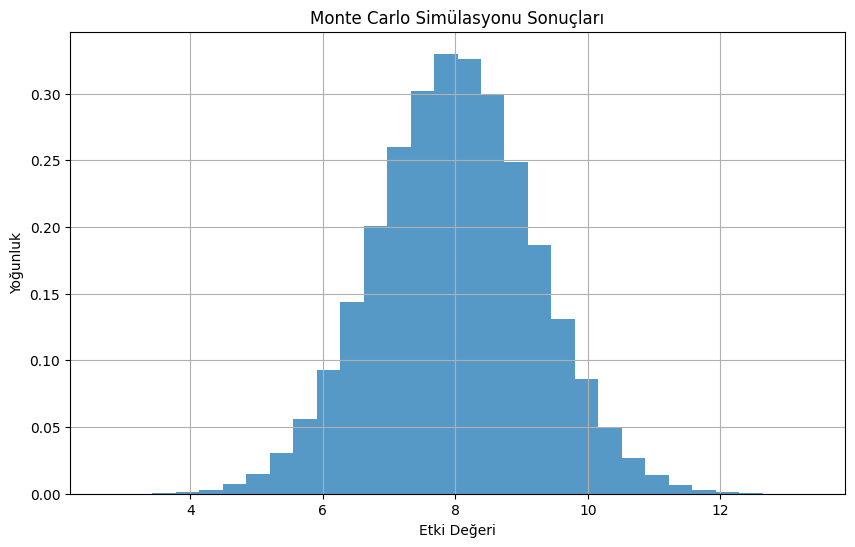

In [24]:


# 3. Monte Carlo simulasyon fonksiyonu
def monte_carlo_simulasyonu(df, sim_sayisi):
    simulasyon_sonuclari = []
    for index, row in df.iterrows():
        olasilik = row['Olasılık']
        etki_mean = 8.0
        etki_std = 1.2  # Örneğin etki standart sapmasını belirlemek için burada 0.1 katsayısını kullanabiliriz
        
        # Rastgele olasılık değerlerini oluştur
        olasilikler = np.random.uniform(0, 1, sim_sayisi)
        
        # Risk olayının gerçekleştiği durumları seç
        gerceklesen_olaylar = (olasilikler < olasilik)
        
        # Etki değerlerini simüle et
        etki_degerleri = np.random.normal(etki_mean, etki_std, sim_sayisi)
        
        # Gerçekleşen olayların etki değerlerini al ve sonuç listesine ekle
        gerceklesen_etkiler = etki_degerleri[gerceklesen_olaylar]
        simulasyon_sonuclari.extend(gerceklesen_etkiler)
    
    return np.array(simulasyon_sonuclari)

# 4. Simülasyon parametreleri
sim_sayisi = 10000

# 5. Monte Carlo simülasyonunu yap
simulasyon_sonuclari = monte_carlo_simulasyonu(df, sim_sayisi)

# 6. Sonuçları görselleştir
plt.figure(figsize=(10, 6))
plt.hist(simulasyon_sonuclari, bins=30, density=True, alpha=0.75)
plt.title('Monte Carlo Simülasyonu Sonuçları')
plt.xlabel('Etki Değeri')
plt.ylabel('Yoğunluk')
plt.grid(True)
plt.show()
